<a href="https://colab.research.google.com/github/lpattelli/pastiche/blob/main/RRTM_LW_ERA5_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determination of spectrally-resolved downwelling atmospheric irradiance based on location-date specific ERA5 atmospheric composition parameters

## 🌍 Rapid Radiative Transfer Model Installation and Testing (RRTM_LW)

This notebook is part of the 21GRD03 PaRaMetriC project.
It guides users through the steps required to download, compile, and test AER's Longwave Rapid Radiative Transfer Model (RRTM_LW) on Google Colab using the Intel Fortran Compiler.

🔧 It includes:
- Installation of required tools and libraries
- Setup of the RRTM_LW source code and utility files
- Compilation of RRTM using Intel's `ifx` compiler
- Execution of example test cases to validate functionality
- An appendix on how to create your own user-defined configuration!

⚠️ _Note: retrieval of ERA5 data relative to user-defined dates and locations requires setting up a personal secret API key. This example will walk through the simulation process fetching some pre-downloaded data relative to the city of Madrid for the month of June (TMY) only_

📌 This notebook is meant for reproducibility and public dissemination, and assumes execution in a Colab environment.

## 🛠️ Step 1: Install Required Tools and Libraries

We'll start by updating the system and installing necessary packages for compiling and running RRTM_LW using Intel's `ifx` compiler. This includes setting up Intel's APT repository.

> see: https://www.intel.com/content/www/us/en/developer/tools/oneapi/fortran-compiler-download.html?operatingsystem=linux&distribution-linux=apt

In [ ]:
# Add Intel repository key
!wget -O- https://apt.repos.intel.com/intel-gpg-keys/GPG-PUB-KEY-INTEL-SW-PRODUCTS.PUB | gpg --dearmor | sudo tee /usr/share/keyrings/oneapi-archive-keyring.gpg > /dev/null

# Configure the repository
!echo "deb [signed-by=/usr/share/keyrings/oneapi-archive-keyring.gpg] https://apt.repos.intel.com/oneapi all main" | sudo tee /etc/apt/sources.list.d/oneAPI.list

# Update and install Intel Fortran Compiler
!sudo apt update
!sudo apt install -y intel-oneapi-compiler-fortran tcsh

--2025-09-27 07:37:02--  https://apt.repos.intel.com/intel-gpg-keys/GPG-PUB-KEY-INTEL-SW-PRODUCTS.PUB
Resolving apt.repos.intel.com (apt.repos.intel.com)... 23.10.199.19, 2600:1407:3c00:e86::a87, 2600:1407:3c00:e9a::a87
Connecting to apt.repos.intel.com (apt.repos.intel.com)|23.10.199.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738 (4.6K) [application/vnd.exstream-package]
Saving to: ‘STDOUT’

-                   100%[===================>]   4.63K  --.-KB/s    in 0s      

2025-09-27 07:37:02 (1.79 GB/s) - written to stdout [4738/4738]

deb [signed-by=/usr/share/keyrings/oneapi-archive-keyring.gpg] https://apt.repos.intel.com/oneapi all main
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://apt.repos.intel.com/oneapi all InRelease [5,680 B]
Get:5 https://developer.download.nvid

## 🔧 Step 2: Set Up RRTM_LW Source Code and Utility Files

We clone the RRTM_LW source code and fix a missing utility file by copying it from the `aer_rt_utils_f77` repository.

In [ ]:
!git clone https://github.com/AER-RC/RRTM_LW.git
!rm RRTM_LW/src/util_linux_pgi.f  # Remove broken link
!git clone https://github.com/AER-RC/aer_rt_utils_f77.git
!cp aer_rt_utils_f77/* RRTM_LW/src/

Cloning into 'RRTM_LW'...
remote: Enumerating objects: 1497, done.
remote: Counting objects: 100% (1497/1497), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 1497 (delta 924), reused 1497 (delta 924), pack-reused 0 (from 0)
Receiving objects: 100% (1497/1497), 3.58 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (924/924), done.
Cloning into 'aer_rt_utils_f77'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14 (delta 11), reused 14 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 7.95 KiB | 7.95 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## ⚙️ Step 3: Compile RRTM_LW Using Intel's `ifx` Compiler

We modify the `makefile.common` to use `ifx`, then compile the code. Note: Ensure Intel tools are sourced before building.

In [ ]:
import fileinput

file_path = "RRTM_LW/makefiles/makefile.common"

with fileinput.input(file_path, inplace=True) as file:
    for index, line in enumerate(file, 1):
        if line.strip() == "FC_TYPE = pgi":
            print("FC_TYPE = intel")
        elif line.strip() == "FC = ifc":
            print("    FC = ifx")
        else:
            print(line, end='')

print("makefile.common modified successfully!")

makefile.common modified successfully!


In [ ]:
!cp aer_rt_utils_f77/util_linux_intel.f RRTM_LW/src/
!source /opt/intel/oneapi/setvars.sh && cd RRTM_LW/ && make -f makefiles/make_rrtm

 
:: initializing oneAPI environment ...
   bash: BASH_VERSION = 5.1.16(1)-release
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: mpi -- latest
:: umf -- latest
:: oneAPI environment initialized ::
 

-----------------
  rrtm_v3.3.1_linux_ifx Makefile
-----------------

This Makefile was designed for the Linux platform.

It uses the ifx compiler, with the following options:
      -r8 -i8 -w -Vaxlib

The object files used are as follows:

      


rrtm_v3.3.1_linux_ifx make in progress ...


  Makefile done


In [ ]:
# Update LD_LIBRARY_PATH for runtime linking
import os
os.environ['LD_LIBRARY_PATH'] = '/opt/intel/oneapi/compiler/latest/lib:/opt/intel/oneapi/compiler/latest/opt/compiler/lib'

## 🧪 Step 4 (optional): Run Example Test Cases

To verify that compilation was successful and the model runs correctly, we download and run AER's test suite.

In [ ]:
# Download and unpack test suite
# aggiunto da Claudio perché il sito di aer non è attivo
!git clone https://baltig.cnr.it/claudio.belotti/examples-from-aer_rrtm_lw_v3.3.git
!tar -xf examples-from-aer_rrtm_lw_v3.3/aer_rrtm_lw_v3.3_run_examples.tar.gz
!rm -rf examples-from-aer_rrtm_lw_v3.3


Cloning into 'examples-from-aer_rrtm_lw_v3.3'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Receiving objects: 100% (15/15), 212.19 KiB | 550.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# Point the test script to correct compiled binary
file_path = "/content/aer_rrtm_lw_v3.3_run_examples/script.run_testcases"
with fileinput.input(file_path, inplace=True) as file:
    for index, line in enumerate(file, 1):
        if line.strip() == "set rrtm_prog = rrtm":
            print("set rrtm_prog = /content/RRTM_LW/rrtm_v3.3.1_linux_ifx")
        else:
            print(line, end='')

In [ ]:
# Run test cases
!cd aer_rrtm_lw_v3.3_run_examples/ && ./script.run_testcases

Run ICRCCM example
RUN input_rrtm_MLS
RUN input_rrtm_MLW
RUN input_rrtm_SAW
RUN input_rrtm_TROP
RUN input_rrtm_MLS-xsec
RUN input_rrtm_MLS-cld, cloud case 1
RUN input_rrtm_MLS-cld, cloud case 2
RUN input_rrtm_MLS-cld, cloud case 3
RUN input_rrtm_sgp_20000313.172900
RUN input_rrtm_sgp_20000313.203000
RUN MLS1 atmosphere with scattering
Running STREAMER param
Running Fu et al. param
Finishing Script


## 📈 Step 5: ERA5-Based Simulation Inputs

To compute spectrally-resolved downwelling irradiance, users should first pull atmospheric composition data for specific dates and locations from the ERA5 Copernicus CDS via secure API tokens. See the [Appendix](#scrollTo=Kd4Z6x8RM5Y7&line=1&uniqifier=1) for details.

For this example, we will use pre-downloaded ERA5 data for the Madrid area uploaded for illustrative purposes to the PASTICHE repo.

In [ ]:
# Clone the data processing notebook repo (PASTICHE)
!git clone https://github.com/21grd03-parametric/pastiche.git

Cloning into 'pastiche'...
remote: Enumerating objects: 2356, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 2356 (delta 26), reused 36 (delta 14), pack-reused 2297 (from 1)
Receiving objects: 100% (2356/2356), 59.38 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (1090/1090), done.


In [ ]:
# Install required Python packages (unpinning package versions preferred in Colab)
!sed 's/==.*$//' pastiche/requirements.txt > pastiche/requirements_unpinned.txt
!pip install -r pastiche/requirements_unpinned.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 121.9 MB/s eta 0:00:00


## 🏙️ Step 6: Run Madrid Example

The following simulation uses pre-downloaded atmospheric profiles from Madrid for selected TMY periods (June 1–30), as detailed in `pastiche/config/tmy_madrid_june_colab.json`

This bypasses the need for real-time API calls, for users without a CDS account.

First let's inspect the query and plot its geographic location

In [ ]:
!pip install cartopy contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 54.4 MB/s eta 0:00:00


In [ ]:
import json
from pprint import pprint

# load json and print content
with open('pastiche/config/tmy_madrid_june_colab.json') as f:
  data = json.load(f)
  pprint(data, sort_dicts=False, compact=True)

# extract geographic info for map plotting
label = data["label"]
lat_max, lon_min, lat_min, lon_max = data["area"]

{'label': 'madrid',
 'area': [40.75, -4.0, 40.0, -3],
 'TMY': [2015, 2014, 2009, 2020, 2023, 2022, 2008, 2009, 2016, 2013, 2023,
         2015],
 'hours': ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
           '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
           '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
           '21:00', '22:00', '23:00'],
 'dates': ['20220601', '20220602', '20220603', '20220604', '20220605',
           '20220606', '20220607', '20220608', '20220609', '20220610',
           '20220611', '20220612', '20220613', '20220614', '20220615',
           '20220616', '20220617', '20220618', '20220619', '20220620',
           '20220621', '20220622', '20220623', '20220624', '20220625',
           '20220626', '20220627', '20220628', '20220629', '20220630']}


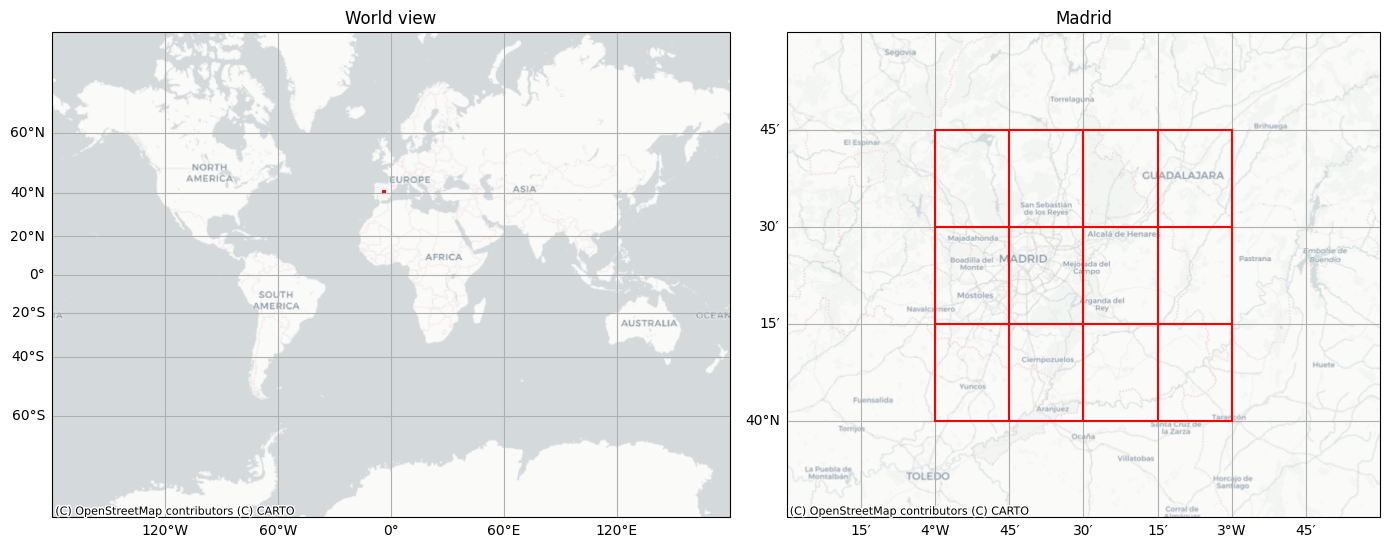

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import contextily as ctx

# define projections and map extents, set ERA5 grid step
proj = ccrs.Mercator()
tcrs = ccrs.PlateCarree()
step = 0.25
bbox = [lon_min, lon_max, lon_max, lon_min, lon_min], [lat_min, lat_min, lat_max, lat_max, lat_min]
zoom_ext  = [lon_min - 2*step, lon_max + 2*step, lat_min - step, lat_max + step]
wrld_ext = [-180, 180, -78, 78]  # clipped Mercator

# get aspect ratios of the panels for gridspec
get_ar = lambda ext: np.divide(*np.subtract(proj.transform_point(ext[1], ext[3], tcrs),
                                            proj.transform_point(ext[0], ext[2], tcrs)))

fig = plt.figure(figsize=(14, 8))
gs  = gridspec.GridSpec(1, 2, width_ratios=[get_ar(wrld_ext), get_ar(zoom_ext)])

# prepare World view panel
ax1 = fig.add_subplot(gs[0], projection=proj)
ax1.set_extent(wrld_ext, crs=tcrs)
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, crs=proj)
ax1.plot(*bbox, color='red', transform=tcrs)  # outline of the queried region

gl1 = ax1.gridlines(draw_labels=True)
gl1.top_labels = False
gl1.right_labels = False
ax1.set_title('World view')

# prepare zoomed view panel
ax2 = fig.add_subplot(gs[1], projection=proj)
ax2.set_extent(zoom_ext, crs=tcrs)
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, crs=proj)

gl2 = ax2.gridlines(draw_labels=True, dms=True)
gl2.xlocator = mticker.FixedLocator(np.arange(zoom_ext[0], zoom_ext[1] + step, step))
gl2.ylocator = mticker.FixedLocator(np.arange(zoom_ext[2], zoom_ext[3] + step, step))
gl2.top_labels = False
gl2.right_labels = False
ax2.set_title(label.capitalize())

# overlay ERA5 pixels grid
lat_ticks = np.arange(lat_min, lat_max + step, step)
lon_ticks = np.arange(lon_min, lon_max + step, step)
[ax2.plot([lon_ticks[0], lon_ticks[-1]], [lat, lat], color='red', transform=tcrs) for lat in lat_ticks]
[ax2.plot([lon, lon], [lat_ticks[0], lat_ticks[-1]], color='red', transform=tcrs) for lon in lon_ticks]

plt.tight_layout()
plt.show()

In [ ]:
# Run example
!cd pastiche/ && python main_parallel.py config/tmy_madrid_june_colab.json

# Inspect output folders
!ls -R pastiche/out/madrid/TMY/

2025-09-27 07:39:28 [PASTICHE    INFO] using /content/RRTM_LW/rrtm_v3.3.1_linux_ifx as RRTM executable
2025-09-27 07:39:28 [PASTICHE    INFO] 20220601
/content/pastiche/era5.py:82: RuntimeWarning: invalid value encountered in arcsin
  c = 2 * np.arcsin(np.sqrt(a))
2025-09-27 07:39:53 [PASTICHE    INFO] elapsed: 0:00:25.199664
2025-09-27 07:39:53 [PASTICHE    INFO] 20220602
2025-09-27 07:40:08 [PASTICHE    INFO] elapsed: 0:00:14.763980
2025-09-27 07:40:08 [PASTICHE    INFO] 20220603
2025-09-27 07:40:23 [PASTICHE    INFO] elapsed: 0:00:15.102851
2025-09-27 07:40:23 [PASTICHE    INFO] 20220604
2025-09-27 07:40:37 [PASTICHE    INFO] elapsed: 0:00:14.586176
2025-09-27 07:40:37 [PASTICHE    INFO] 20220605
2025-09-27 07:40:52 [PASTICHE    INFO] elapsed: 0:00:14.833695
2025-09-27 07:40:52 [PASTICHE    INFO] 20220606
2025-09-27 07:41:07 [PASTICHE    INFO] elapsed: 0:00:14.676490
2025-09-27 07:41:07 [PASTICHE    INFO] 20220607
2025-09-27 07:41:22 [PASTICHE    INFO] elapsed: 0:00:15.423722
2025-0

## 🔍 Step 7: Explore the Structure of Output for a Sample Day

Each NetCDF file in the dataset contains 24 hourly timesteps across a lat-lon grid and 17 longwave spectral bands.

In this step, we:
- Load the sample dataset (`20220601.nc`)
- Use `.info()` method to inspect variable metadata
- Focus on the `sd` variable, i.e., the **RRTM-calculated surface downward long-wave radiation flux**
- Print `lw_band_limits`: the min/max wavenumbers (in cm⁻¹) for each spectral band

⚠️ Note: Band index 0 contains total longwave flux and is excluded from spectral analysis.


In [ ]:
import xarray as xr

# Load file
ds = xr.open_dataset("pastiche/out/madrid/TMY/06/20220601.nc")

# Explore structure
ds.info()

# Highlight metadata for spectral variable
print("\nMetadata for 'sd':", ds['sd'].attrs)

# Display band limits
band_limits = ds['lw_band_limits'].values
print("\nSpectral Band Limits [cm⁻¹]:")
print(band_limits)

xarray.Dataset {
dimensions:
	time = 24 ;
	latitude = 4 ;
	longitude = 5 ;
	lw_bands = 17 ;
	band_limits = 2 ;

variables:
	float64 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;
	float64 skt(time, latitude, longitude) ;
		skt:units = K ;
		skt:long_name = Skin temperature ;
	float64 cbh(time, latitude, longitude) ;
		cbh:units = m ;
		cbh:long_name = Cloud base height ;
	float64 tcc(time, latitude, longitude) ;
		tcc:units = (0 - 1) ;
		tcc:long_name = Total cloud cover ;
		tcc:standard_name = cloud_area_fraction ;
	float64 tcwv(time, latitude, longitude) ;
		tcwv:units = kg m**-2 ;
		tcwv:long_name = Total column vertically-integrated water vapour ;
		tcwv:standard_name = lwe_thickness_of_atmosphere_mass_content_of_water_vapor ;
	float64 u10(time, latitude, longitude) ;
		u10:units = m s**-1 ;
		u10:long_name = 10 metre U wind component ;
	float64 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind com

## 🎨 Step 8: Visualize Spectral Downwelling Irradiance

Here, we:
- Extract `sd` and average over latitude/longitude
- Exclude 0th band (total flux)
- Create a 2D plot with hour of day on the x-axis (UTC) and wavenumber [cm⁻¹] on the y-axis

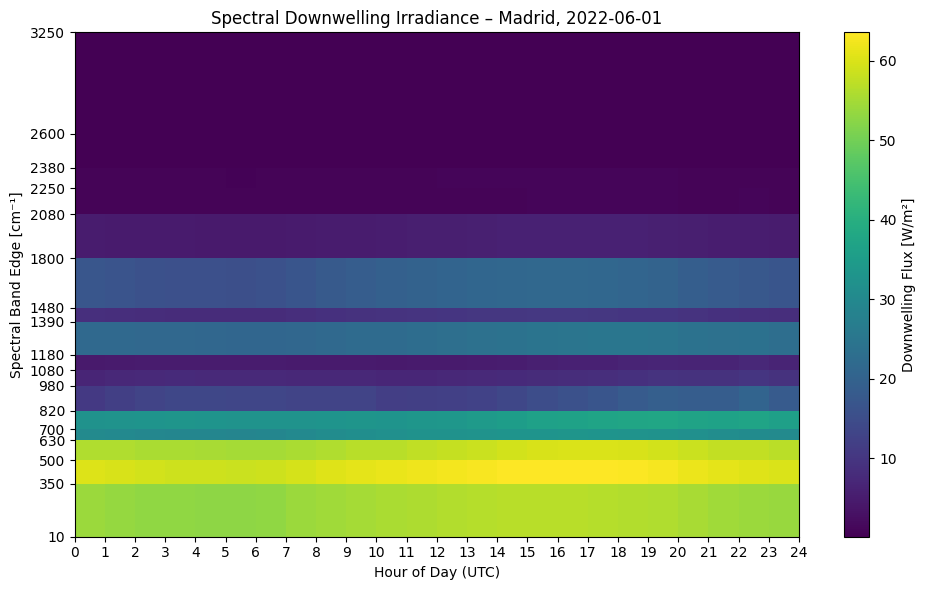

In [ ]:
# Load 1-day sample
ds = xr.open_dataset("pastiche/out/madrid/TMY/06/20220601.nc")

# Irradiance matrix: remove band 0, average spatially
irr = ds['sd'].mean(dim=['latitude', 'longitude']).isel(lw_bands=slice(1, None)).values  # shape (24, 16)

# Spectral edges in cm⁻¹
edges_y = np.unique(ds['lw_band_limits'].values.flatten())  # shape (17,)

# Time edges as hours (24 bins → 25 edges)
edges_x = np.arange(25)

# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(edges_x, edges_y, irr.T, cmap='viridis', shading='auto')
plt.colorbar(label='Downwelling Flux [W/m²]')
plt.xticks(edges_x)
plt.yticks(edges_y, [f"{v:.0f}" for v in edges_y])
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Spectral Band Edge [cm⁻¹]")
plt.title("Spectral Downwelling Irradiance – Madrid, 2022-06-01")
plt.tight_layout()
plt.show()

## 🔗 Step 9: Merge all the output of one month and explore a longer time series
First, we use `cdo`, the Climate Data Operators package, to merge all the files in a directory.

In [ ]:
!sudo apt install cdo
!cd pastiche/out/madrid/TMY/06 && cdo -b F64 mergetime *.nc ../madrid_tmy_06.nc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  binfmt-support blt fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback
  fonts-font-awesome fonts-lato fonts-lyx fonts-noto-mono fonts-urw-base35
  ghostscript libcdi0 libclang-cpp11 libdxflib3 libeccodes-data libeccodes0
  libeckit0d libevdev2 libfftw3-double3 libgs9 libgs9-common libgudev-1.0-0
  libidn12 libijs-0.35 libimagequant0 libinput-bin libinput10 libjbig2dec0
  liblbfgsb0 libllvm11 liblzf1 libmagics++-data libmagplus3v5 libmd4c0
  libmtdev1 libodc-0d libpfm4 libproj22 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5network5 libqt5svg5 libqt5widgets5 libraqm0 librsync2 libterralib3
  libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0
  libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 libxsimd-dev libz3-4 libz3-dev
  llvm-11 llvm-11-dev llvm-11-l

Then we visualize the irradiance as a function of time and spectral band.

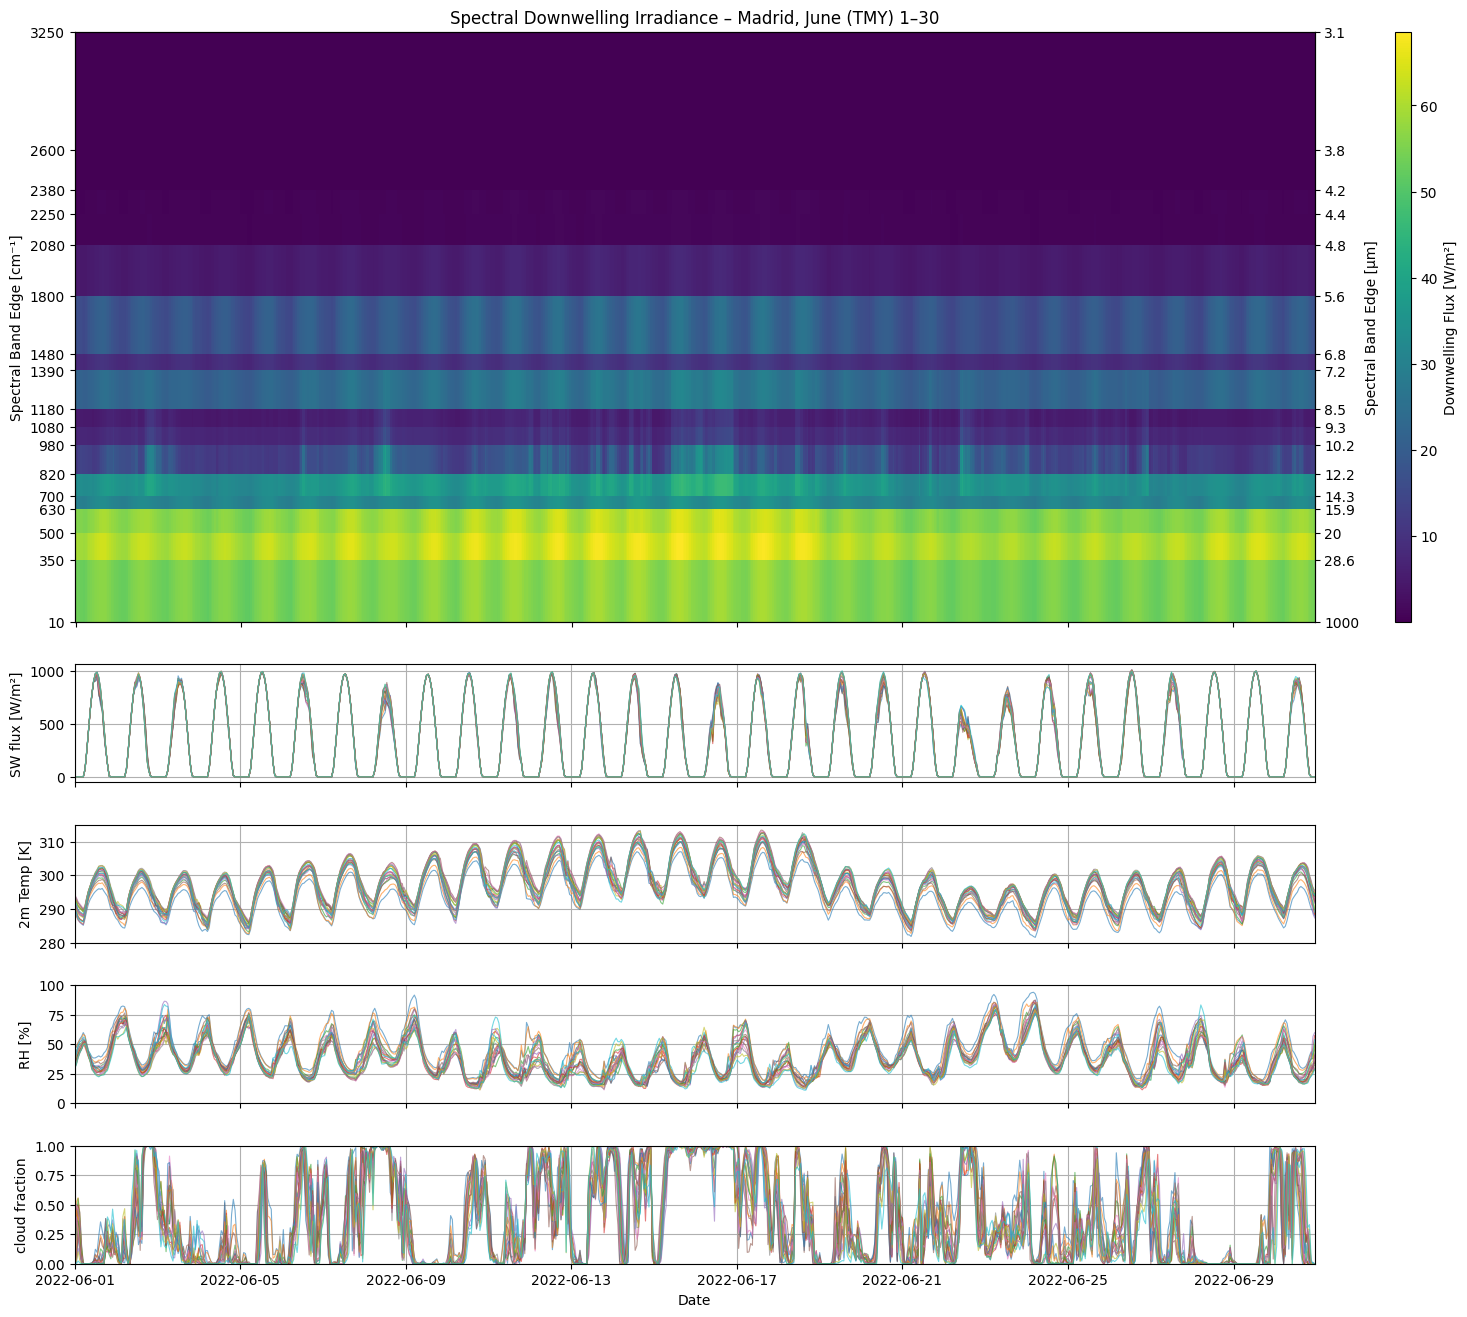

In [ ]:
# Load dataset
ds_june = xr.open_dataset("pastiche/out/madrid/TMY/madrid_tmy_06.nc", engine="h5netcdf")

# Spectral irradiance: drop band 0, average lat/lon
sd_avg = ds_june['sd'].mean(dim=['latitude', 'longitude']).isel(lw_bands=slice(1, None))
irr_matrix = sd_avg.values  # shape: (time, bands)

# Spectral edges
edges_cm = np.unique(ds_june['lw_band_limits'].values.flatten())
edges_um = 1e4 / edges_cm

# Time edges for pcolormesh
time = ds_june['time'].values
dt = np.diff(time).mean()
time_edges = np.concatenate([[time[0] - dt / 2], time + dt / 2])

# Set up figure with 5 rows: 1 big + 4 context strips
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(5, 1, height_ratios=[5, 1, 1, 1, 1], hspace=0.2)

# ---------- Main Spectral Plot ----------
ax_main = fig.add_subplot(gs[0])
pm = ax_main.pcolormesh(time_edges, edges_cm, irr_matrix.T, cmap='viridis', shading='auto')

ax_main.set_ylabel("Spectral Band Edge [cm⁻¹]")
ax_main.set_yticks(edges_cm)
ax_main.set_yticklabels([f"{v:.0f}" for v in edges_cm])
ax_main.set_title("Spectral Downwelling Irradiance – Madrid, June (TMY) 1–30")
ax_main.set_xticklabels([])  # hide X-axis labels

# Right Y-axis: μm
ax_right = ax_main.twinx()
ax_right.set_ylim(ax_main.get_ylim())
ax_right.set_ylabel("Spectral Band Edge [μm]")
ax_right.set_yticks(edges_cm)
ax_right.set_yticklabels([f"{int(wl)}" if wl == int(wl) else f"{wl:.1f}" for wl in edges_um])

# ---------- Context Panel Helper ----------
def add_context_panel(gs_index, varname, ylabel, ylimits=None):
    ax = fig.add_subplot(gs[gs_index])
    data = ds_june[varname]
    for i in range(data.sizes['latitude']):
        for j in range(data.sizes['longitude']):
            ax.plot(time, data[:, i, j], lw=0.8, alpha=0.6)
    ax.set_ylabel(ylabel)
    ax.set_xlim(time[0], time[-1])
    ax.grid(True)
    if ylimits:
        ax.set_ylim(ylimits)
    if gs_index < 4:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Date")

# ---------- Add 4 Context Panels ----------
add_context_panel(1, "avg_sdswrf", "SW flux [W/m²]")
add_context_panel(2, "t2m", "2m Temp [K]")
add_context_panel(3, "r", "RH [%]", ylimits=[0, 100])
add_context_panel(4, "tcc", "cloud fraction", ylimits=[0, 1])

# ---------- External Colorbar ----------
bbox = ax_main.get_position()
cbar_ax = fig.add_axes([bbox.x1 + 0.05, bbox.y0, 0.01, bbox.height])  # aligned to the main panel
fig.colorbar(pm, cax=cbar_ax, label="Downwelling Flux [W/m²]")

# plt.savefig("spectral_irradiance.pdf", dpi=300, bbox_inches='tight')
plt.show()

Finally, we plot the whole (spectrally integrated) irradiance as a function of time. The spectrally integrated values are in band 0 of the irradiance  variables. These values are compared with the ERA5 prediction for the total downward IR fluxes.

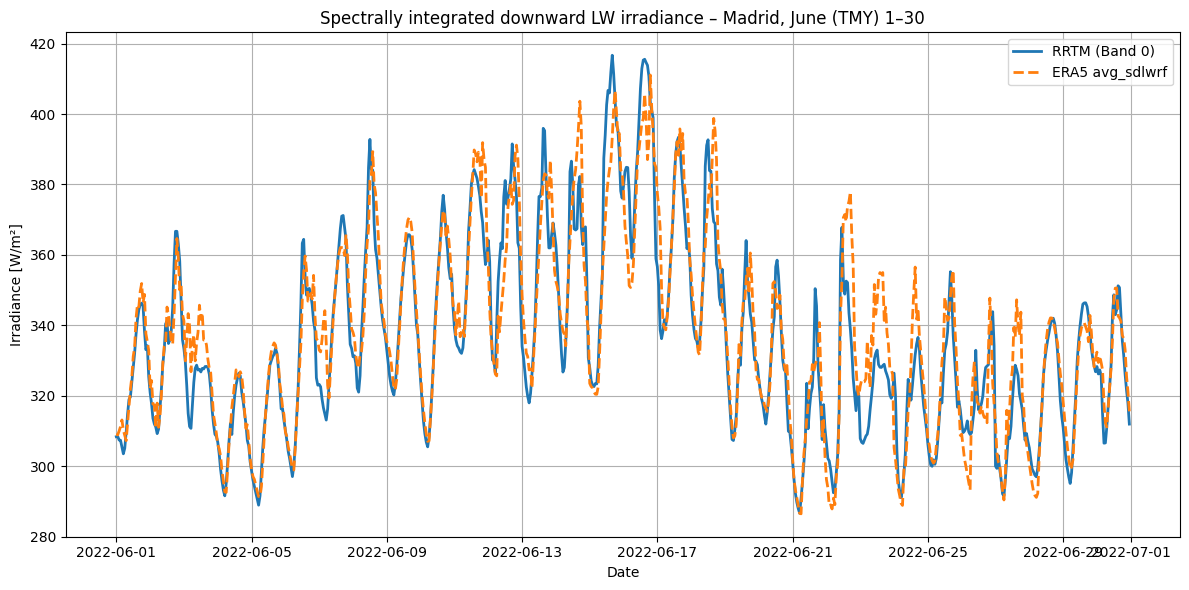

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

# RRTM-calculated (band 0)
rrtm_flux = ds_june['sd'].mean(dim=['latitude', 'longitude']).isel(lw_bands=0)

# ERA5 total downward longwave flux
era_flux = ds_june['avg_sdlwrf'].mean(dim=['latitude', 'longitude'])

# Plot both
ax.plot(ds_june['time'], rrtm_flux, label='RRTM (Band 0)', lw=2)
ax.plot(ds_june['time'], era_flux, label='ERA5 avg_sdlwrf', lw=2, linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Irradiance [W/m²]')
ax.set_title('Spectrally integrated downward LW irradiance – Madrid, June (TMY) 1–30')
ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

# 📎 Appendix: Run your own experiment

To be able to run your own experiment, you will need first to download the ERA5 data for the location and the time you are interested in.


🗝️ _Note: to query ERA5 directly, users will need to set up their Copernicus CDS credentials as secrets._


## 📡 1. Setup the CDS API personal access token

Please follow the first step to setup the CDSAPI, the Climate Data Store (CDS) Application Program Interface (API):
https://cds.climate.copernicus.eu/how-to-api

Once you are registered and logged in, the page will display two items, the api url and your own key:

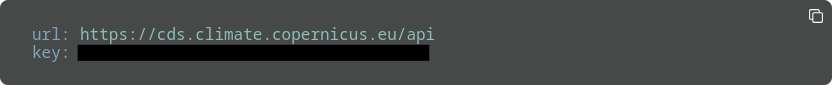

## 🔐 2. Store your API credentials as Colab secrets

Now you will need to store the value of your api key and url in the secret section of this colab notebook as in the picture: on the left-hand side menu click on the "secret" section (the key icon) and add a key:
* name: `cdsapi_key`
* value: your personal access token

If it is not present already also add the key named `cdsapi_url` with value`https://cds.climate.copernicus.eu/api`


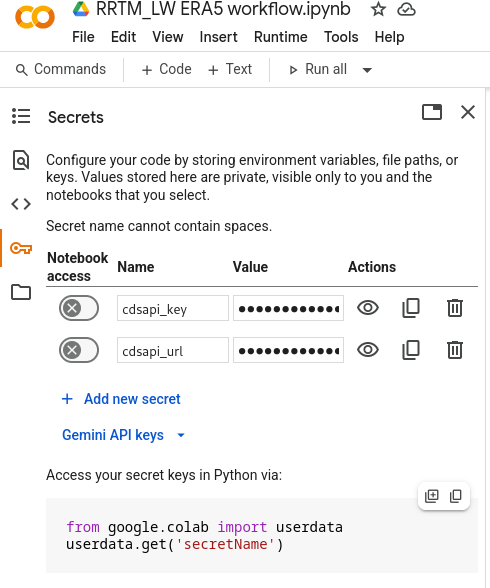

## 🧩 3. Create a configuration file for your experiment

Under the `conf` directory of PASTICHE you will find a set of `.json` files with the configuration needed to first download your input data and then run the PASTICHE code.

To get started open `create_conf.py`, there are two test locations defined:
1. edit the `area` values, the vector defines the latitude and longitude limits in degrees the order is defined as in the CDSAPI, North -> West -> South -> East.
2. define the list of years used for each month to construct the TMY
3. if you want, edit the label with a meaningful name.

Now you can run `python create_conf.py`, the output will be stored in the `PASTICHE/conf/` directory.

In [ ]:
!cd pastiche/ && python create_conf.py

## ⏳ 4. Download ERA5 data for your experiment location

Because of the way ERA5 is organised you will need to download two sets of data:
1. ERA5 hourly data on single levels from 1940 to present
2. ERA5 hourly data on pressure levels from 1940 to present

Note, depending on the geographical and temporal extension of your request (i.e. how may pixel fall in your `area` and how many months are in your `TMY`) these two steps might require a looooong time (up to one day) 🐌💤.

In [ ]:
# First we need the cdsapi
! pip install cdsapi

In [ ]:
# Setup secrets as environment variables so the scripts can access the values

from google.colab import userdata
import os

os.environ['CDSAPI_URL'] = userdata.get('cdsapi_url')
os.environ['CDSAPI_KEY'] = userdata.get('cdsapi_key')

In [ ]:
# Run the single level query
!cd pastiche/ && python sl_parallel_request_single_day_colab.py config/tmy_mytest_2.json

2025-09-27 07:49:31,780 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-27 07:49:31,780 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-27 07:49:31,796 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-27 07:49:31,796 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-27 07:49:31,940 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-27 07:49:31,940 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements

In [ ]:
# Run the pressure level query
!cd pastiche/ && python pl_parallel_request_single_day_colab.py config/tmy_mytest_2.json

## ✅ 5. Run PASTICHE with your own configuration

You now have everything you need to run your own experiment! See [Step 7](#scrollTo=A3I2pIakAxAR) for details on the structure of output files.  

In [ ]:
!cd pastiche/ && python main_parallel.py config/tmy_mytest_2.json